In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## load dataset here
df = pd.read_csv("/content/drive/My Drive/Datasets/Vietnamese_online_news/vietnamese_online_news.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,0,0,218270,NaN,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...",3,0,docbao.vn,"Tên cướp tiệm vàng Huế đại uý công an, công tá...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308
1,1,1,218269,doãn hằng,"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G",Sức khỏe - Đời sống,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469
2,2,2,218268,NaN,"Kết thi nghiệp THPT 2022 trung bình môn toán, ...",3,0,thanhnien.vn,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...",Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901
3,3,3,218267,NaN,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,1,0,vnexpress,Người chết mưa lũ 'nghìn một' Mỹ 28,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498
4,4,4,218266,mi lan,Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",Thời sự,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170


#1. Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184539 entries, 0 to 184538
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0.1   184539 non-null  int64 
 1   Unnamed: 0     184539 non-null  int64 
 2   id             184539 non-null  int64 
 3   author         110923 non-null  object
 4   content        161218 non-null  object
 5   picture_count  184539 non-null  int64 
 6   processed      184539 non-null  int64 
 7   source         184534 non-null  object
 8   title          184522 non-null  object
 9   topic          184539 non-null  object
 10  url            184539 non-null  object
 11  crawled_at     184125 non-null  object
dtypes: int64(5), object(7)
memory usage: 16.9+ MB


In [ ]:
#Check for missing values
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
id,0
author,73616
content,23321
picture_count,0
processed,0
source,5
title,17
topic,0


In [ ]:
# Drop rows where crucial columns like 'content' or 'title' are missing
df = df.dropna(subset=['content', 'title'])

In [ ]:
#Optionally fill missing values in less crucial columns
df['picture_count'] = df['picture_count'].fillna(0)  # Assuming 0 pictures if not specified
df['author'] = df['author'].fillna('Unknown')  # Fill missing authors with 'Unknown'

<ipython-input-7-fc9807855bfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['picture_count'] = df['picture_count'].fillna(0)  # Assuming 0 pictures if not specified
<ipython-input-7-fc9807855bfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['author'] = df['author'].fillna('Unknown')  # Fill missing authors with 'Unknown'


In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
# Strip whitespace from string columns
df['author'] = df['author'].str.strip()
df['title'] = df['title'].str.strip()
df['content'] = df['content'].str.strip()
df['source'] = df['source'].str.strip()
df['topic'] = df['topic'].str.strip()

In [ ]:
# Handle Vietnamese text encoding
df['content'] = df['content'].apply(lambda x: x.encode('utf-8').decode('utf-8'))

In [ ]:
# Convert 'Crawled At' to datetime if not already
df['crawled_at'] = pd.to_datetime(df['crawled_at'])

In [ ]:
#Removing Unnecessary Columns
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','id', 'url'])

In [ ]:
#Resetting Index
df = df.reset_index(drop=True)

In [ ]:
df.head()

,author,content,picture_count,processed,source,title,topic,crawled_at
0,Unknown,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...",3,0,docbao.vn,"Tên cướp tiệm vàng Huế đại uý công an, công tá...",Pháp luật,2022-08-01 09:09:22.817308
1,doãn hằng,"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G",Sức khỏe - Đời sống,2022-08-01 09:09:21.181469
2,Unknown,"Kết thi nghiệp THPT 2022 trung bình môn toán, ...",3,0,thanhnien.vn,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...",Giáo dục,2022-08-01 09:09:15.311901
3,Unknown,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,1,0,vnexpress,Người chết mưa lũ 'nghìn một' Mỹ 28,Thế giới,2022-08-01 09:09:02.211498
4,mi lan,Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",Thời sự,2022-08-01 09:09:01.601170


#2. EDA

In [ ]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       picture_count      processed                     crawled_at
count  161217.000000  161217.000000                         160843
mean        2.081102       0.999150  2022-07-09 03:45:24.858085376
min         0.000000       0.000000     2022-06-07 14:05:50.904322
25%         1.000000       1.000000  2022-06-28 06:07:01.897053952
50%         1.000000       1.000000  2022-07-09 06:36:09.678287104
75%         3.000000       1.000000  2022-07-21 06:07:32.109015552
max        74.000000       1.000000     2022-08-01 09:09:22.817308
std         2.673160       0.029139                            NaN


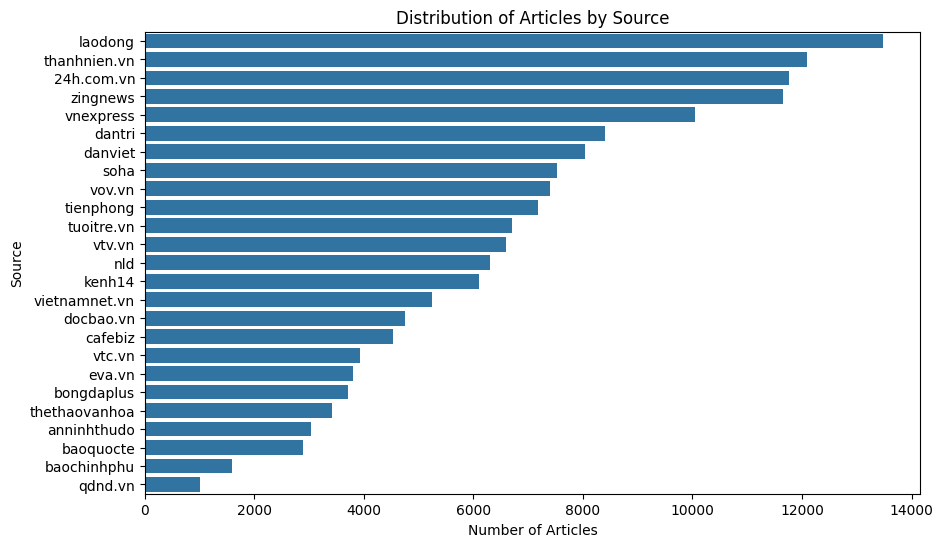

In [ ]:
# Distribution of Articles by Source
plt.figure(figsize=(10, 6))
sns.countplot(y='source', data=df, order=df['source'].value_counts().index)
plt.title('Distribution of Articles by Source')
plt.xlabel('Number of Articles')
plt.ylabel('Source')
plt.show()

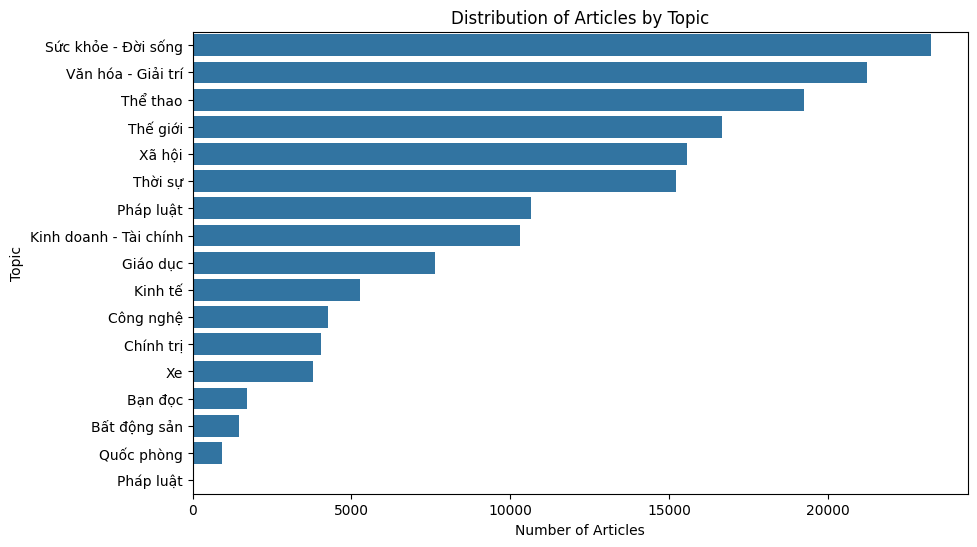

In [ ]:
# Distribution of Articles by Topic
plt.figure(figsize=(10, 6))
sns.countplot(y='topic', data=df, order=df['topic'].value_counts().index)
plt.title('Distribution of Articles by Topic')
plt.xlabel('Number of Articles')
plt.ylabel('Topic')
plt.show()

<ipython-input-52-bb1780ab6829>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content_Length', y='topic', data=average_content_length, palette='viridis')


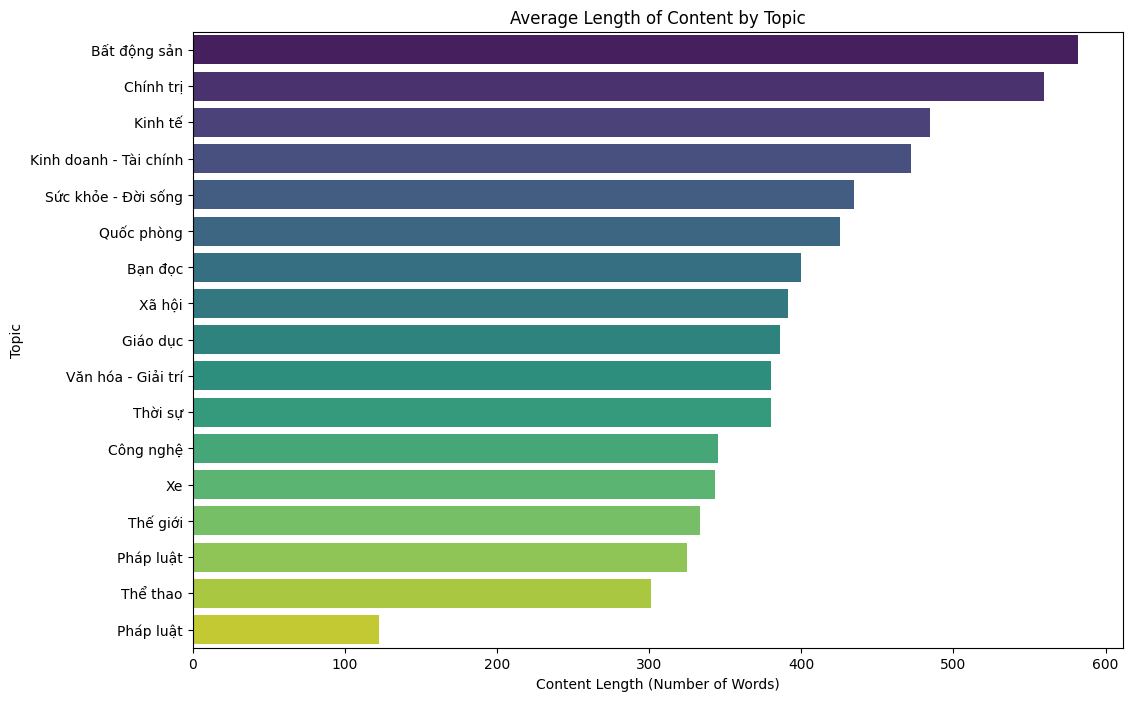

In [ ]:
# Calculate the length of content
df['Content_Length'] = df['content'].apply(lambda x: len(x.split()))

# Calculate the average content length by topic
average_content_length = df.groupby('topic')['Content_Length'].mean().reset_index()

# Sort by average content length in descending order
average_content_length = average_content_length.sort_values(by='Content_Length', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Content_Length', y='topic', data=average_content_length, palette='viridis')
plt.title('Average Length of Content by Topic')
plt.xlabel('Content Length (Number of Words)')
plt.ylabel('Topic')
plt.show()

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.0 MB/s eta 0:00:00


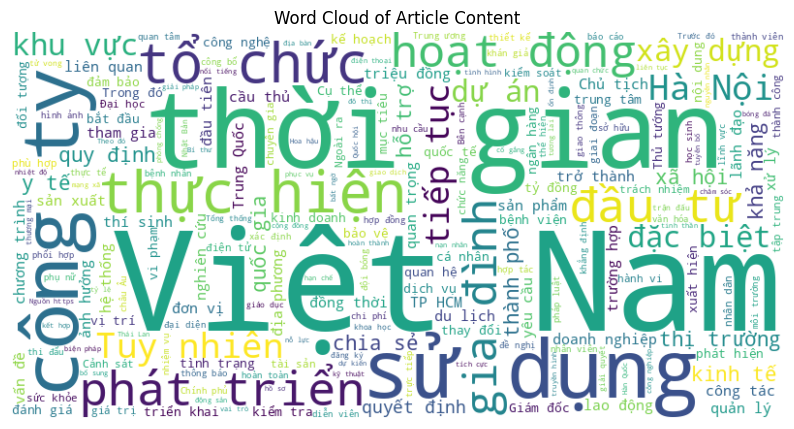

In [ ]:
# Word Cloud for Content (Optional, requires wordcloud package)
from wordcloud import WordCloud

text = ' '.join(df['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Content')
plt.show()

#3. Summarization

In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=0bd869ddbc82d80e827988d014dcd4f5dede89ec2f3a41246d841206f0f36d73
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from googletrans import Translator

In [ ]:
model_name="facebook/mbart-large-50-many-to-one-mmt"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
translator = Translator()

In [ ]:
def translate_to_vietnamese(text):
        # Translate the text to Vietnamese
        translated = translator.translate(text, dest='vi')
        return translated.text

def summarize_text(text):
        # Translate the text to Vietnamese
        vietnamese_text = translate_to_vietnamese(text)
        # Tokenize and summarize the text
        inputs = tokenizer(vietnamese_text, return_tensors="pt", max_length=512, truncation=True)
        summary_ids = model.generate(
            inputs.input_ids,
            max_length=150,
            min_length=40,
            length_penalty=2.0,
            num_beams=4,
            early_stopping=True
        )
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        vietnamese_summary = translate_to_vietnamese(summary)
        return vietnamese_summary

def summarize_dataframe(df, text_column, summary_column="summary"):
        # Apply summarization to the specified column in the DataFrame
        df[summary_column] = df[text_column].apply(summarize_text)
        return df

In [ ]:
# Summarize the DataFrame
df_summarized = summarize_dataframe(df.head(), text_column="content")

<ipython-input-19-ea1d3cda004f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[summary_column] = df[text_column].apply(summarize_text)


In [ ]:
df_summarized[['title', 'content', 'summary']]

,title,content,summary
0,"Tên cướp tiệm vàng Huế đại uý công an, công tá...","Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...","Hôm qua, 31/7, Sở cảnh sát của Thừa Thin-Hue đ..."
1,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G","Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...","Gần đây, người đứng đầu Bộ Phát triển Công ngh..."
2,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...","Kết thi nghiệp THPT 2022 trung bình môn toán, ...",Kết quả tốt nghiệp trung học năm 2022 toán học...
3,Người chết mưa lũ 'nghìn một' Mỹ 28,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,Thống đốc Kentucky Andy Beshear vào ngày 31/7 ...
4,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,"Theo những người xung quanh khu vực đường phố,..."


#4. Title Generation:

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
# Pre-trained T5 model and tokenizer for Vietnamese
model_name = "VietAI/vit5-base-vietnews-summarization"  # Example for Vietnamese T5
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/820k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.12k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/904M [00:00<?, ?B/s]

In [ ]:
# Function to generate title based on content
def generate_title(text):
    input_text = "summarize: " + text
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=20, num_beams=4, early_stopping=True)
    title = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return title

In [ ]:
df_retitle = df.head()

In [ ]:
# Apply title generation to the Content column
df_retitle['Generated_Title'] = df_retitle['content'].apply(lambda x: generate_title(x))

# Display the first few rows with generated titles
df_retitle[['title', 'content', 'Generated_Title']]

<ipython-input-44-a3d0c8984a2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retitle['Generated_Title'] = df_retitle['content'].apply(lambda x: generate_title(x))


,title,content,Generated_Title
0,"Tên cướp tiệm vàng Huế đại uý công an, công tá...","Chiều 31/7, Công an tỉnh Thừa Thiên - Huế thôn...",Tên cướp dùng súng AK bất ngờ xông thẳng vào t...
1,"Bỏ mạng 5G, Nga tiến thẳng 4G 6G","Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",Các nhà khoa học Nga đang có kế hoạch phát tri...
2,"Địa phương đứng đầu tổng 3 môn văn, toán, ngoạ...","Kết thi nghiệp THPT 2022 trung bình môn toán, ...",Hội đồng thi đua - khen thưởng năm 2022 vừa cô...
3,Người chết mưa lũ 'nghìn một' Mỹ 28,Thống đốc Kentucky Andy Beshear hôm 31/7 đợt m...,Số người chết vì mưa lũ ở bang Kentucky tiếp t...
4,"Hải Phòng: Hình ảnh xe ""điên"" tai nạn liên hoà...",Vụ tai nạn giao thông liên hoàn phố đi Tam Bạc...,"20h30 tối 19/3, một vụ tai nạn giao thông liên..."
